<a href="https://colab.research.google.com/github/sagar625/SalaryPrediction/blob/master/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook will predict salary of a new job posting based on model created by historical data.

In [0]:
__author__ = "Sagar Goswami"
__email__ = "sagar7958@gmail.com"

In [9]:
#Getting data from Dropbox 
!curl -L -o SalaryData.zip https://www.dropbox.com/sh/bh5rp4oaao5y8mt/AABpWmMOb4oUFHdJ28nABAo8a?dl=0
!unzip SalaryData.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131M    0  131M    0     0  26.8M      0 --:--:--  0:00:04 --:--:-- 37.6M
Archive:  SalaryData.zip
mapname:  conversion of  failed
 extracting: test_features.csv       
 extracting: train_features.csv      
 extracting: train_salaries.csv      
 extracting: Salary Prediction Interview Assignment.docx  


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")



In [41]:
features= pd.read_csv("train_features.csv")
target = pd.read_csv("train_salaries.csv")
features.shape, target.shape


((1000000, 8), (1000000, 2))

In [42]:
features.info()  ,
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [43]:
target.drop_duplicates() , features.drop_duplicates()

(                   jobId  salary
 0       JOB1362684407687     130
 1       JOB1362684407688     101
 2       JOB1362684407689     137
 3       JOB1362684407690     142
 4       JOB1362684407691     163
 ...                  ...     ...
 999995  JOB1362685407682      88
 999996  JOB1362685407683     160
 999997  JOB1362685407684      64
 999998  JOB1362685407685     149
 999999  JOB1362685407686      88
 
 [1000000 rows x 2 columns],
                    jobId companyId  ... yearsExperience milesFromMetropolis
 0       JOB1362684407687    COMP37  ...              10                  83
 1       JOB1362684407688    COMP19  ...               3                  73
 2       JOB1362684407689    COMP52  ...              10                  38
 3       JOB1362684407690    COMP38  ...               8                  17
 4       JOB1362684407691     COMP7  ...               8                  16
 ...                  ...       ...  ...             ...                 ...
 999995  JOB1362685407

In [0]:
training_set_with_label = pd.merge(features,target,on='jobId')

In [45]:
training_set_with_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [54]:
training_set_with_label = training_set_with_label[training_set_with_label['salary'] >0]
training_set_with_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [55]:
training_set_with_label.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [56]:
training_set_with_label.describe(include='object')

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362685103973,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


In [57]:
training_set_with_label.corr()['salary']

yearsExperience        0.375013
milesFromMetropolis   -0.297686
salary                 1.000000
Name: salary, dtype: float64

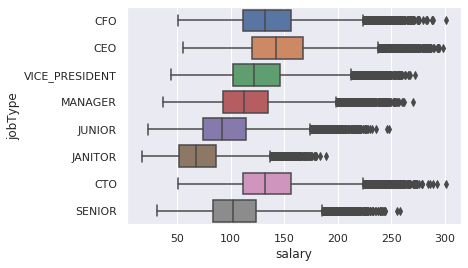

In [58]:
sns.boxplot('salary','jobType',data=training_set_with_label)

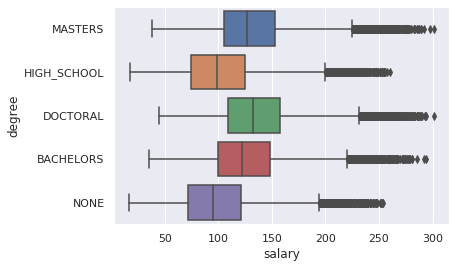

In [59]:
sns.boxplot('salary','degree',data=training_set_with_label)

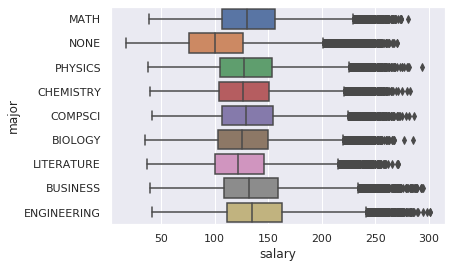

In [60]:
sns.boxplot('salary','major',data=training_set_with_label)

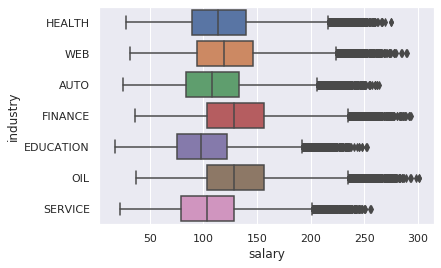

In [61]:
sns.boxplot('salary','industry',data=training_set_with_label)

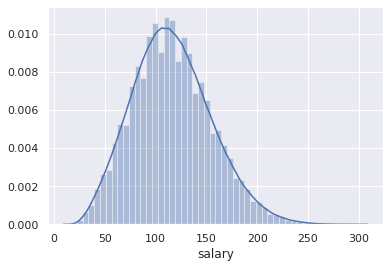

In [62]:
sns.distplot(training_set_with_label['salary'])

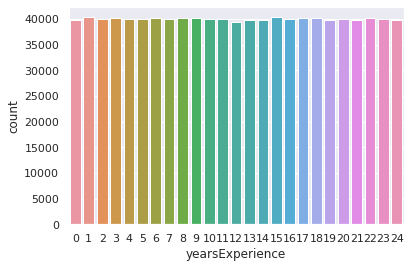

In [63]:
sns.countplot(training_set_with_label['yearsExperience'])

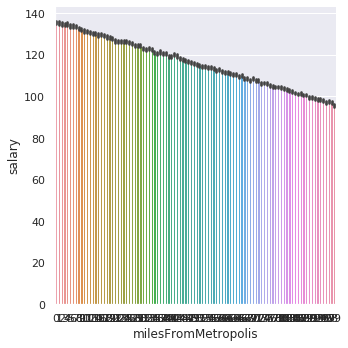

In [89]:
sns.catplot('milesFromMetropolis','salary',kind="bar",data=training_set_with_label)

In [74]:
outliers_value = training_set_with_label['salary'].mean()*1.5
outliers_value

174.09359746798734

In [72]:
outliers=training_set_with_label[training_set_with_label['salary']>=outliers_value]
outliers.count()

jobId                  75321
companyId              75321
jobType                75321
degree                 75321
major                  75321
industry               75321
yearsExperience        75321
milesFromMetropolis    75321
salary                 75321
dtype: int64

In [75]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75321 entries, 6 to 999979
Data columns (total 9 columns):
jobId                  75321 non-null object
companyId              75321 non-null object
jobType                75321 non-null object
degree                 75321 non-null object
major                  75321 non-null object
industry               75321 non-null object
yearsExperience        75321 non-null int64
milesFromMetropolis    75321 non-null int64
salary                 75321 non-null int64
dtypes: int64(3), object(6)
memory usage: 5.7+ MB


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

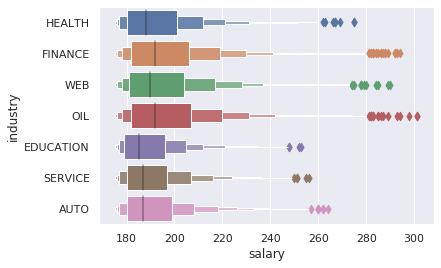

In [76]:
sns.boxenplot('salary','industry',data=outliers)

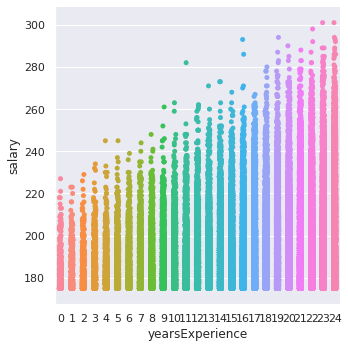

In [83]:
sns.catplot("yearsExperience","salary",data=outliers)

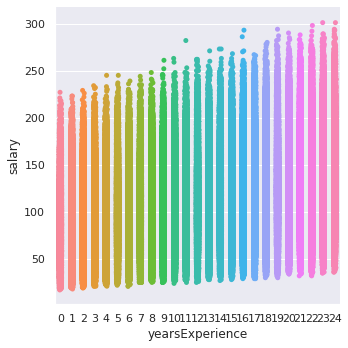

In [84]:
sns.catplot("yearsExperience","salary",data=training_set_with_label)